In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

Question 1 : Image Compression Using K- Means

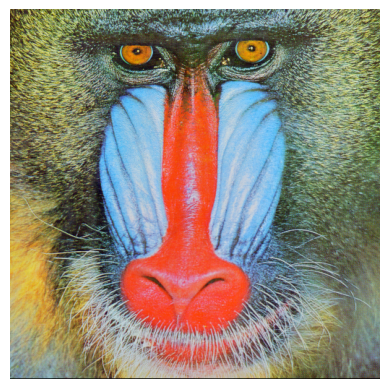

In [2]:
img = plt.imread("test.png")
plt.imshow(img)
plt.axis("off")
plt.show()

Task 1(a) : The computeCentroid() function takes ‘n’ 3 dimensional data points as input and returns the mean vector of the data. The input data points are essentially the pixels of the image with the three features as the Red Shade, Green Shade and Blue shade of that pixel. Here's the original image.

In [3]:
def computeCentroid(data):
    means = np.mean(data,axis = 0)
    return means

In [4]:
def distance(x,y):
    d = y-x
    d = d.reshape(3,1)
    d_t = np.transpose(d)
    distance = np.dot(d_t,d)[0][0]
    return distance

Task 1(b) The function mykmeans() is essentially the implementation of the k-means clustering algorithm. It takes the image, number of clusters, and number of epochs as the input and returns the cluster centers generated by the k-means clustering algorithm.

In [5]:
def mykmeans(img,n_clusters,epochs):
    np.random.seed(19)
    flat_img = img.reshape(-1,3)
    m,_ = flat_img.shape
    means = np.zeros((n_clusters,3))
    for i in range(n_clusters):
        random_pixels = np.random.choice(m,size = n_clusters,replace=False)
        means[i] = computeCentroid(flat_img[random_pixels])
    index = np.zeros(m)
    for _ in range(epochs):
        for pixel in range(m):
            min_distance = float('inf')
            temp = None
            for i in range(n_clusters):
                dist = distance(means[i],flat_img[pixel])
                if dist < min_distance:
                    min_distance = dist
                    temp = i

            index[pixel] = temp
        for k in range(n_clusters):
            points = flat_img[index == k]
            means[k] = computeCentroid(points)
    return means,index

In [6]:
def custom_compressImg(img,n_clusters,epochs):
    means,index = mykmeans(img,n_clusters,epochs)
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]

    # getting back the 3d matrix (row, col, rgb(3))
    recovered = recovered.reshape(img.shape)
    return recovered
    


In [7]:
def compare_with_sklearn(image, n_colors):
    # Convert image to 2D array (pixels by channels)
    w, h, d = original_shape = tuple(image.shape)
    image_array = np.reshape(image, (w * h, d))

    # Fit KMeans model to image data
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Predict cluster assignments for all pixels in the image
    labels = kmeans.predict(image_array)

    # Replace each pixel with its cluster center
    compressed_image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            compressed_image[i][j] = kmeans.cluster_centers_[labels[label_idx]]
            label_idx += 1

    custom_compressed = custom_compressImg(img,n_colors,5)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Custom Compressed Image')
    plt.imshow(custom_compressed)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Compressed Image (SK-Learn) ({} colors)'.format(n_colors))
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.imshow(compressed_image)
    plt.axis("off")
    # plt.savefig('compressed_' + str(n_colors) + '_colors.png')

Task 1(c), 1(d) Here are the results of image compression,values of k ranging from 1-10

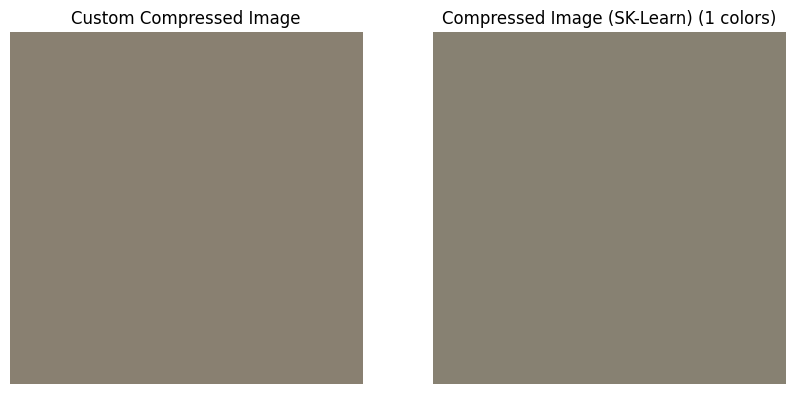

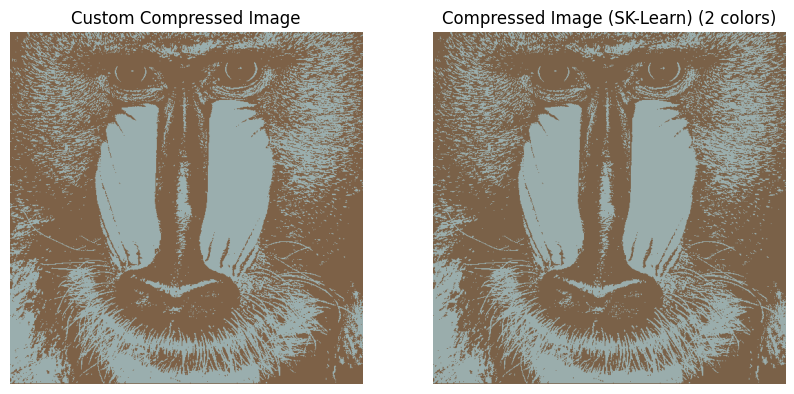

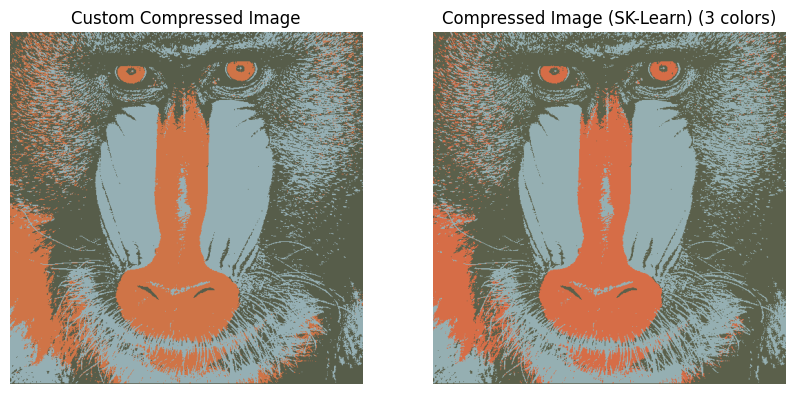

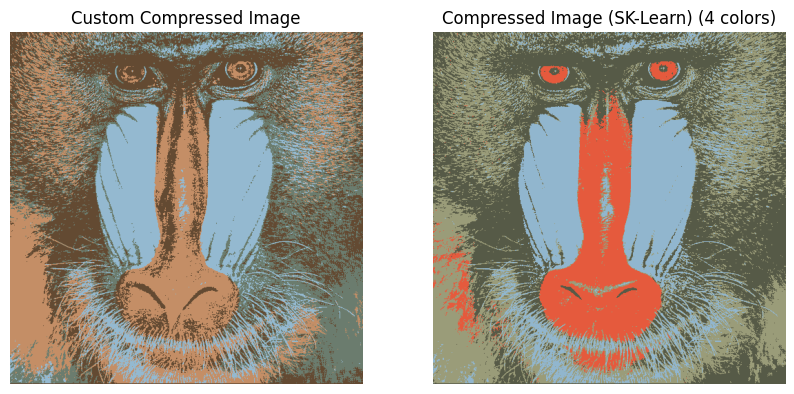

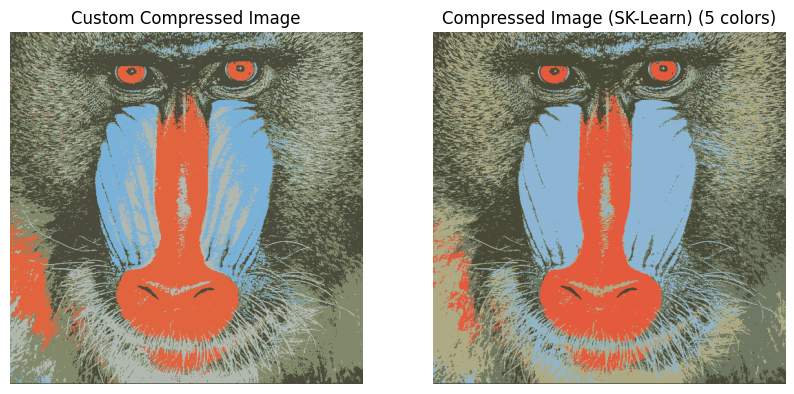

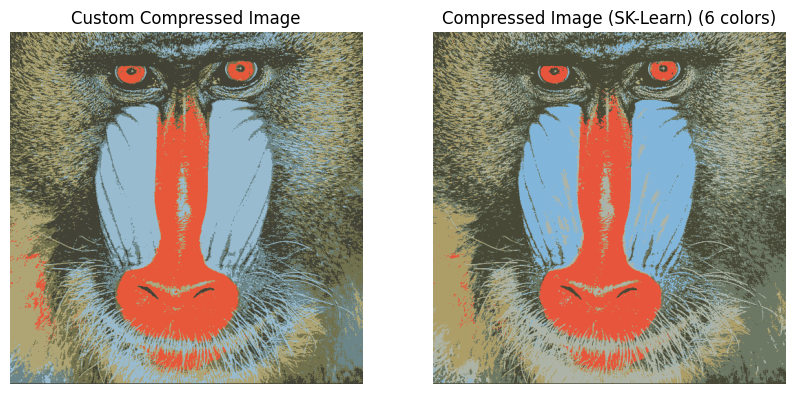

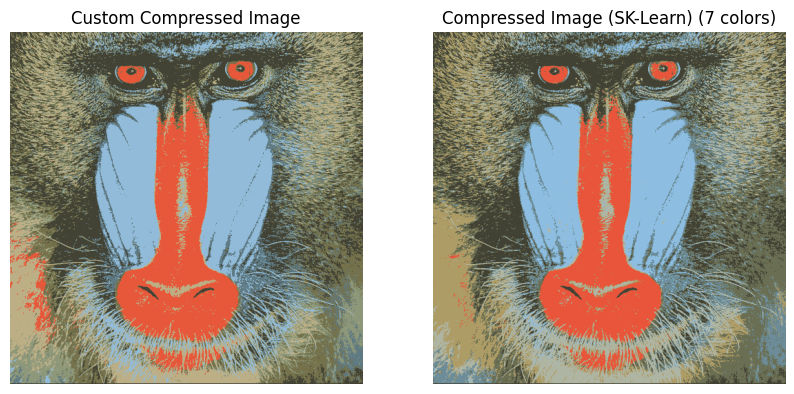

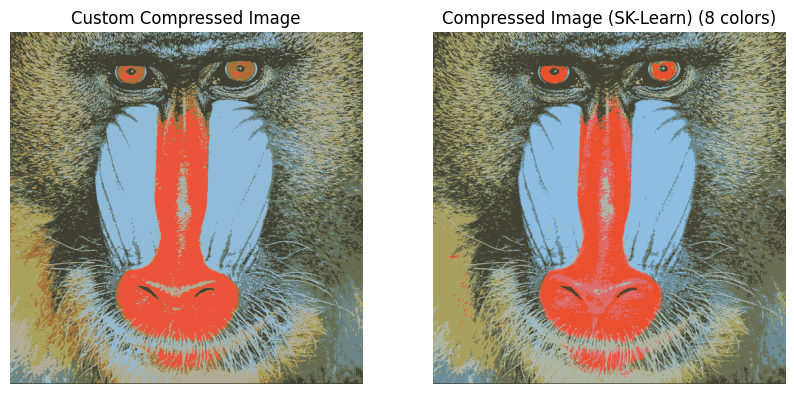

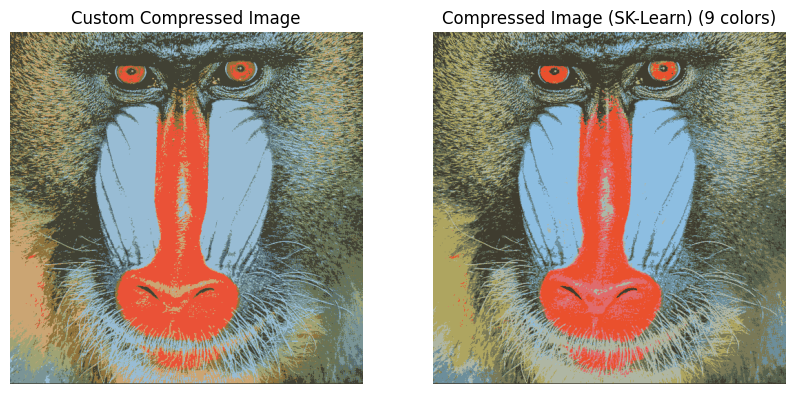

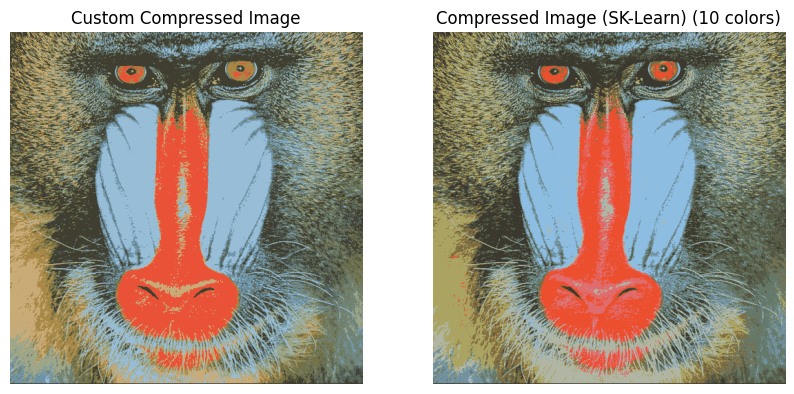

In [8]:
for i in range(1,11):
    compare_with_sklearn(img,i)

Task 1 (e) : We know that the pixels which are closer to each other are more likely to belong to the same clusters. To incorporate this into our implementation, we modify the implementation of the distance calculating functions. Now the contribution of both the color distance and the spatial distance will be added to the distance term. This change has been made in the code.
Here are some observations:
After incorporating spatial coherence into the image compression algorithm using k-means clustering, several observations can be made:
Preservation of Local Structures: Spatial coherence helps in maintaining local structures in the image. Pixels that are spatially close in the original image are more likely to be assigned to the same cluster. This results in better preservation of edges, textures, and other local details.
Controlled Compression: The degree of spatial coherence can be adjusted by varying the spatial weight parameter. Increasing the spatial weight puts more emphasis on spatial proximity, leading to stronger spatial coherence but potentially higher computational cost. Conversely, decreasing the spatial weight may result in less spatially coherent compression but faster processing.
Below is the comparison of the compressed images and given images for different values of k

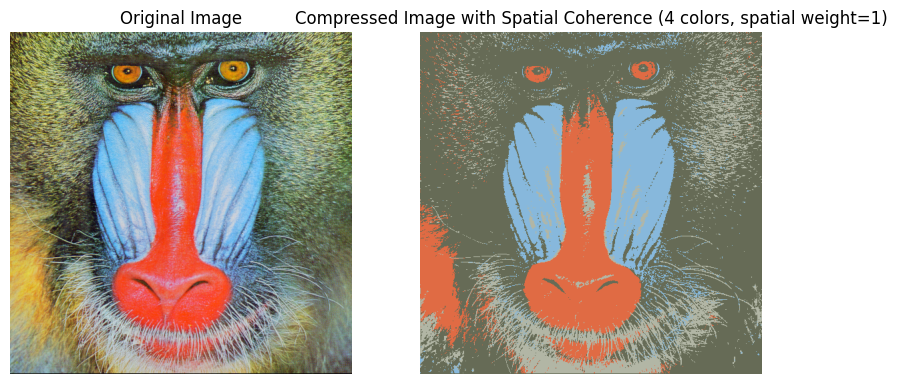

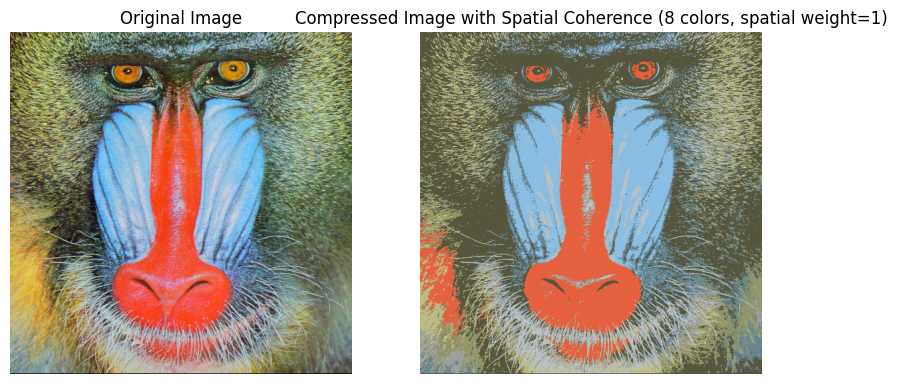

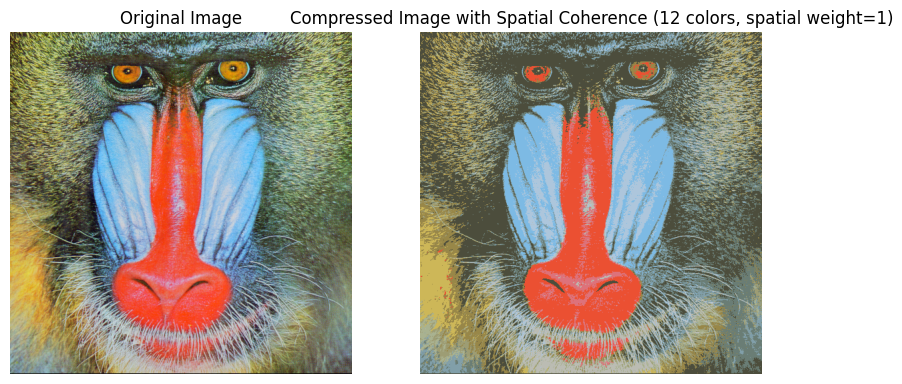

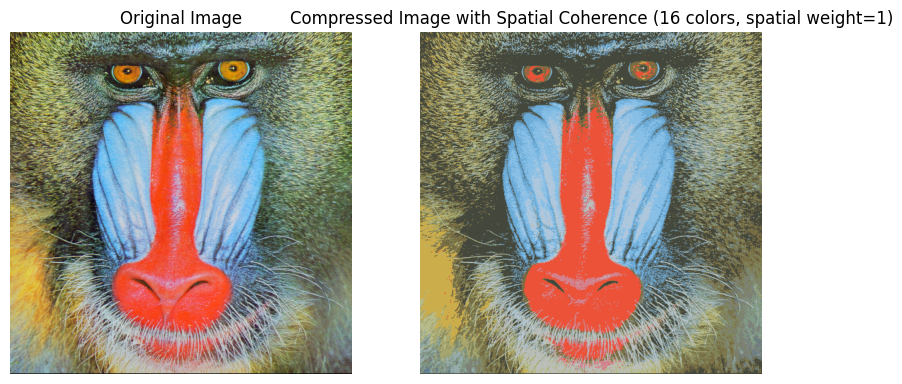

In [9]:
def computeMeans(data):
    means = np.mean(data,axis = 0)
    return means

def euclidean_distance(matrix_size, cell1, cell2):
    # Get the row and column numbers for each cell
    row1, col1 = (cell1 - 1) // matrix_size, (cell1 - 1) % matrix_size
    row2, col2 = (cell2 - 1) // matrix_size, (cell2 - 1) % matrix_size
    
    # Calculate the Euclidean distance
    distance = np.sqrt((row2 - row1)**2 + (col2 - col1)**2)
    
    return distance

def customDistance(x,y,i,j,spatial_weight):
    color_distance = np.sqrt(np.sum((x - y)**2))
    spatial_distance = euclidean_distance(512,i,j)
    return (color_distance) + (spatial_weight*spatial_distance)

def mykmeans_spatial(img,n_clusters,epochs):
    np.random.seed(19)
    flat_img = img.reshape(-1,3)
    m,_ = flat_img.shape
    means = np.zeros((n_clusters,3))
    pixels = np.zeros((n_clusters))
    for i in range(n_clusters):
        random_pixels = np.random.choice(m,size = n_clusters,replace=False)
        pixels[i] = np.mean(random_pixels)
        means[i] = computeMeans(flat_img[random_pixels])
    index = np.zeros(m)
    for _ in range(epochs):
        for pixel in range(m):
            min_distance = float('inf')
            temp = None
            for i in range(n_clusters):
                dist = customDistance(means[i],flat_img[pixel],pixels[i],pixel,1)
                if dist < min_distance:
                    min_distance = dist
                    temp = i

            index[pixel] = temp
        for k in range(n_clusters):
            points = flat_img[index == k]
            new_mean = np.mean(points)
            means[k] = computeMeans(points)
            pixels[k] = new_mean
    return means,index

def custom_compressImg(img,n_clusters,epochs):
    means,index = mykmeans_spatial(img,n_clusters,epochs)
    centroid = np.array(means)
    recovered = centroid[index.astype(int), :]

    # getting back the 3d matrix (row, col, rgb(3))
    recovered = recovered.reshape(img.shape)
    return recovered
    

lst = [4,8,12,16]
for i in lst:
    custom_compressed = custom_compressImg(img,i,5)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Compressed Image with Spatial Coherence ({} colors, spatial weight={})'.format(i, 1))
    plt.imshow(custom_compressed)
    plt.axis('off')
    plt.show()

Question 2 : Support Vector Machines

Task 1(a): Loading Dataset and Pre - Processing
The iris dataset was loaded and pre- processed as mentioned in the task.

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# Step 2: Select only 'setosa' and 'versicolor' classes
selected_classes = iris.target.isin([0, 1])
X = iris.data[selected_classes]
y = iris.target[selected_classes]

# Step 3: Extract petal length and petal width features
X = X[['petal length (cm)', 'petal width (cm)']]

# Step 4: Normalize the dataset
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 5: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
# print(X_train.shape)


Task 1(b) : Training Linear SVC
On the training dataset, the results obtained are shown as follows:

c:\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


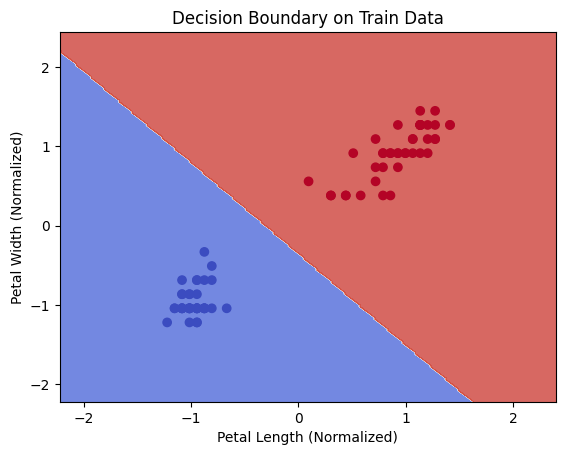

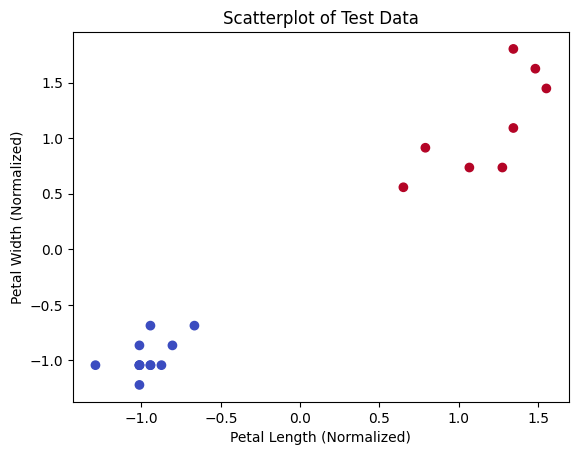

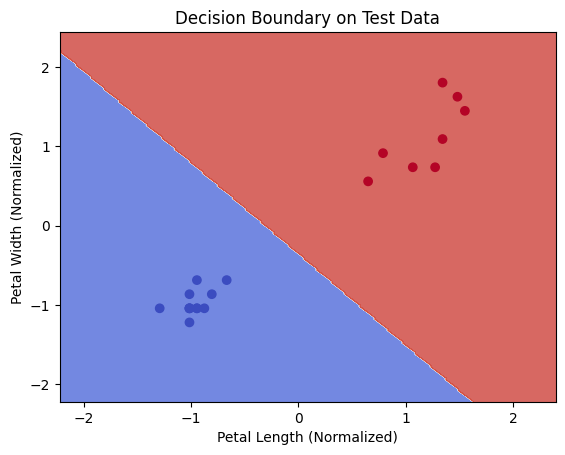

In [11]:
from sklearn.svm import LinearSVC

# Step 1: Train a LinearSVC model on the training data
model = LinearSVC()
model.fit(X_train, y_train)

# Step 2: Plot the decision boundary of the model on the training data
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.title('Decision Boundary on Train Data')
plt.show()

# Step 3: Generate a scatterplot of the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.title('Scatterplot of Test Data')
plt.show()

# Step 4: Plot the decision boundary of the model on the scatterplot of the test data
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Petal Length (Normalized)')
plt.ylabel('Petal Width (Normalized)')
plt.title('Decision Boundary on Test Data')
plt.show()

Task 2(a) : Generating a synthetic moon dataset.
Here is the dataset generated as mentioned in the task

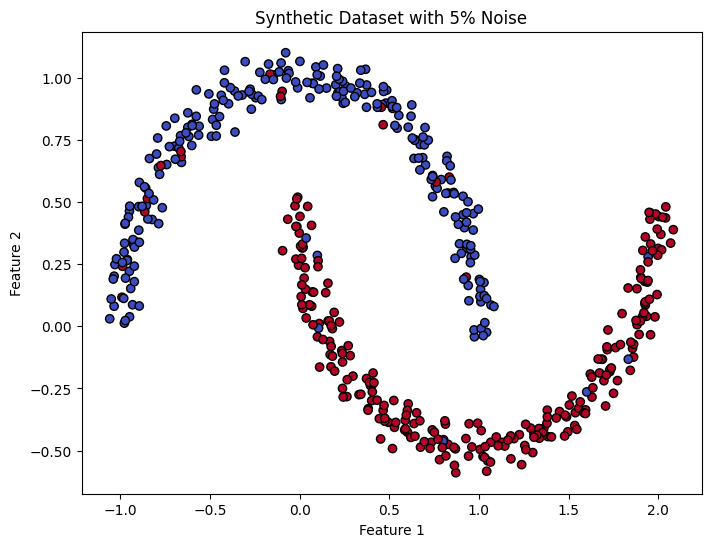

In [12]:
from sklearn.datasets import make_moons
# Generate synthetic dataset with make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=37)

# Add 5% noise (misclassifications)
num_noise = int(0.05 * len(y))
noise_indices = np.random.choice(len(y), num_noise, replace=False)
y[noise_indices] = 1 - y[noise_indices]  # flip the labels

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with 5% Noise')
plt.show()

In [13]:
def plot_decision_boundary(model, x_min, x_max, y_min, y_max):
    XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, cmap=plt.cm.coolwarm, alpha=0.8)


Task 2(b) : Training SVM models on the moon dataset
Here are the results obtained on training SVM models on the dataset using 3 different Kernels, namely Linear, Polynomial, RBF.

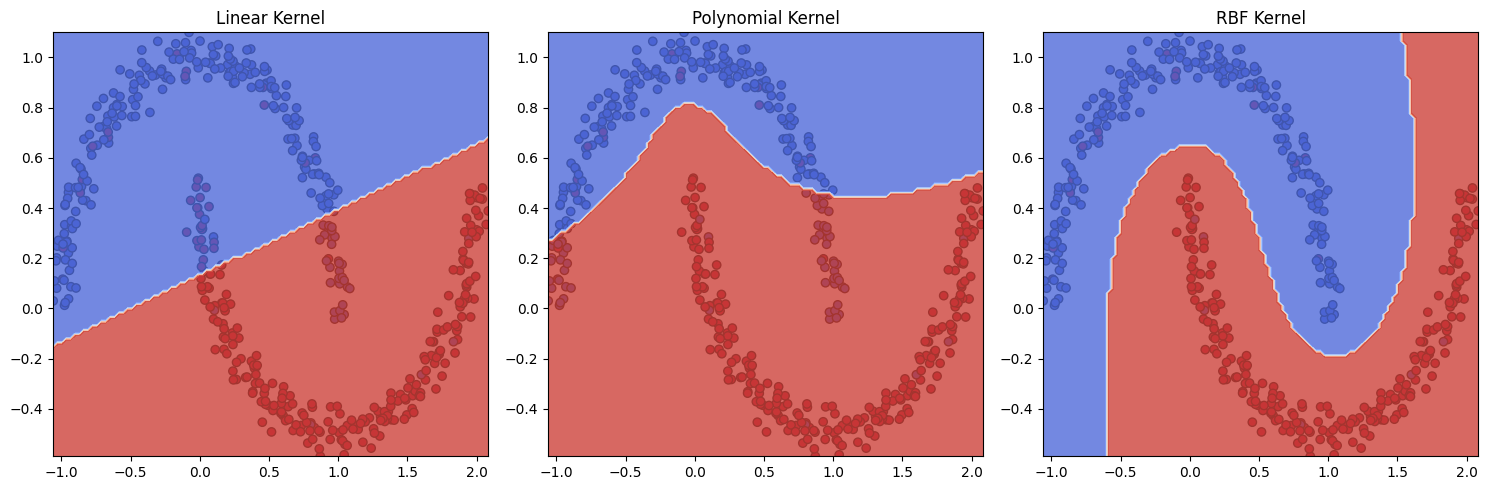

In [14]:
from sklearn.svm import SVC

# Train SVM models with different kernels
linear_svc = SVC(kernel='linear')
poly_svc = SVC(kernel='poly', degree=5)  # Polynomial kernel of degree 3
rbf_svc = SVC(kernel='rbf')  # Radial Basis Function (RBF) kernel

# Fit the models
linear_svc.fit(X, y)
poly_svc.fit(X, y)
rbf_svc.fit(X, y)

# Plot decision boundaries
plt.figure(figsize=(15, 5))

# Linear kernel
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plot_decision_boundary(linear_svc, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
plt.title('Linear Kernel')

# Polynomial kernel
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plot_decision_boundary(poly_svc, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
plt.title('Polynomial Kernel')

# RBF kernel
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plot_decision_boundary(rbf_svc, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
plt.title('RBF Kernel')

plt.tight_layout()
plt.show()


Task 2(c) : Hyperparameter Tuning for RBF model:
I used Grid Search to perform Hyperparameter tuning, using 4 different sets of parameters for C and gamma. The GridSearch Function found the best parameter, which was then plotted as shown. The best hyperparameters were found to be C = 100 and gamma = 0.1

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001]}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)

# Perform grid search
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best cross-validation score:", best_score)


Best hyperparameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.95


Task 2(e) : Plot using best hyperparameters

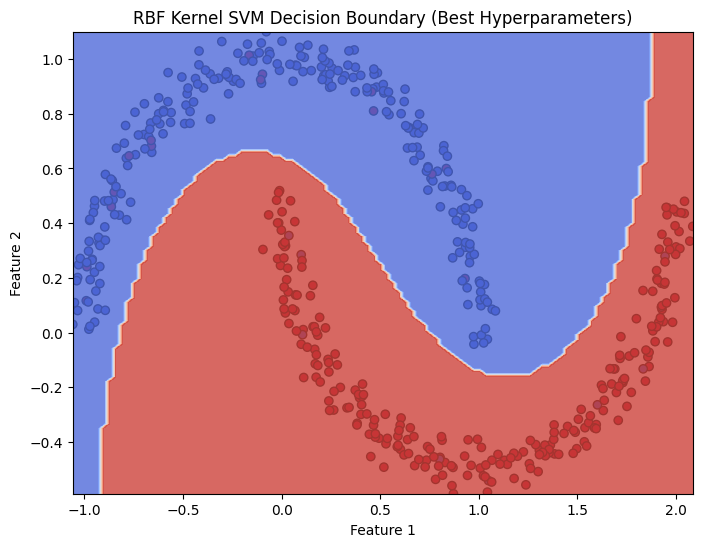

In [16]:
# Train the RBF kernel SVM model with the best hyperparameters
best_gamma = best_params['gamma']
best_C = best_params['C']
best_rbf_svc = SVC(kernel='rbf', gamma=best_gamma, C=best_C)
best_rbf_svc.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plot_decision_boundary(best_rbf_svc, X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF Kernel SVM Decision Boundary (Best Hyperparameters)')
plt.show()
